In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [104]:
import pickle
import tarfile
import os
from sklearn.model_selection import train_test_split


In [105]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Loading CIFAR10 Dataset

In [106]:
file = '/content/data_batch_1'

In [107]:
data_batch_1 = unpickle(file)

In [108]:
type(data_batch_1)

dict

In [109]:
len(data_batch_1)

4

In [110]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [111]:
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [112]:
data_batch_1[b'data'].shape

(10000, 3072)

In [113]:
data_batch_1[b'data'][0].shape

(3072,)

In [114]:
image = data_batch_1[b'data'][0]
image = image.reshape(3, 32, 32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
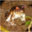

In [115]:
image = image.transpose(1, 2, 0)
image

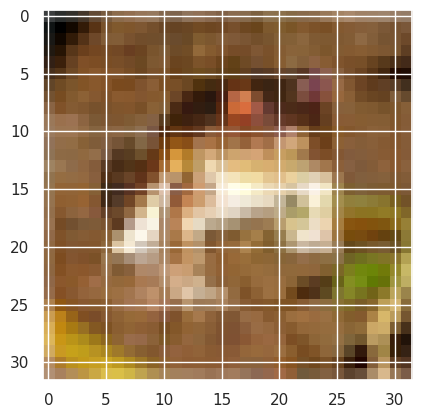

In [116]:
plt.imshow(image)

(10000, 32, 32, 3)


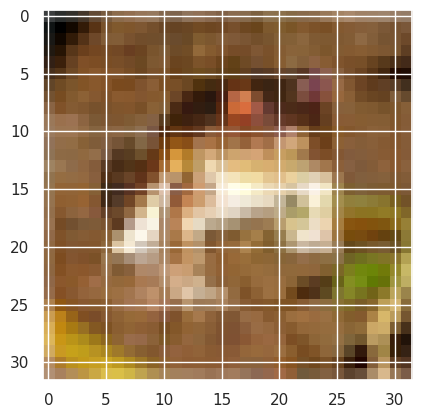

In [118]:
data = data_batch_1[b'data']
data = data.reshape(len(data), 3, 32, 32).transpose(0,2,3,1)
print(data.shape)
plt.imshow(data[0])

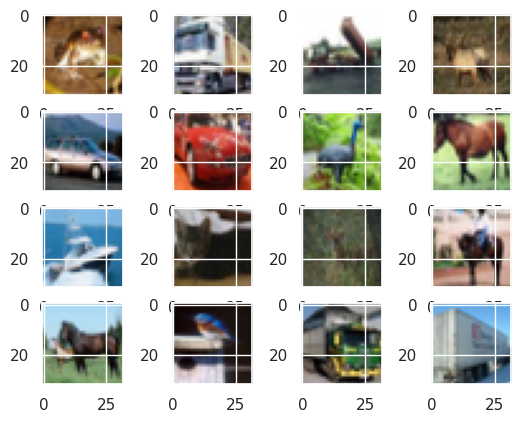

In [119]:
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(data[i])
plt.show()

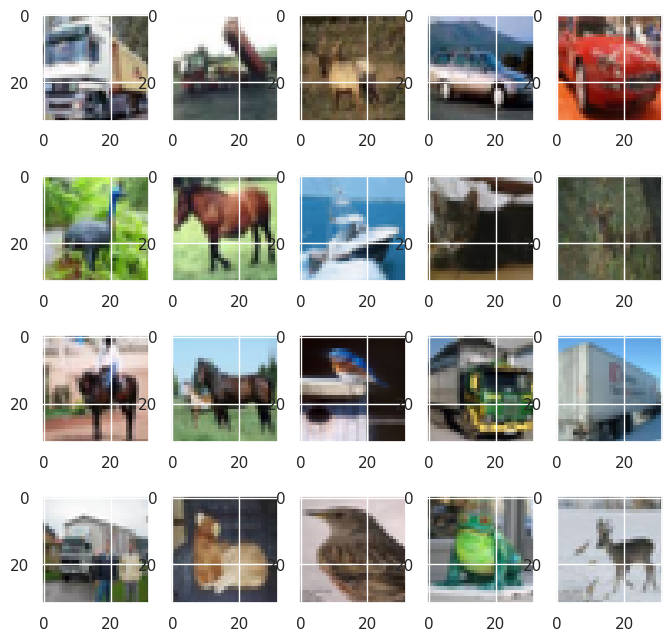

In [120]:
columns = 5
rows = 4
fig = plt.figure(figsize = (8,8))
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[i])
plt.show()

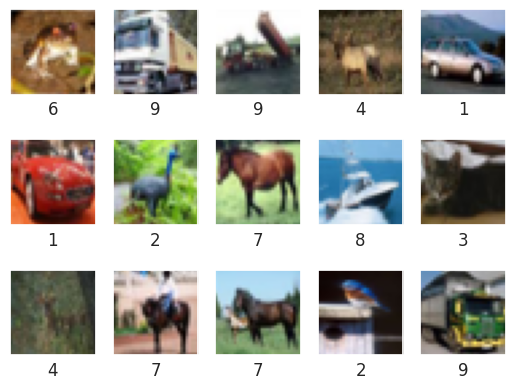

In [121]:
data_label= data_batch_1[b'labels']
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(data[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=data_label[i])

In [122]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data_batch_1[b'data']  # Features (input data)
y = data_batch_1[b'labels']  # Labels (target)

# Split data into training and testing sets (80% train, 20% test)
# Flatten the image data
X_flat = X.reshape(X.shape[0], -1)  # Reshape to (num_samples, num_features)

# Split flattened data into training and testing sets (80% train, 20% test)
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)


# Initialize SVM classifier
svm_model = SVC(kernel='rbf')  # Best performing kernel out of poly and linear

# Train the model on the training data
svm_model.fit(X_train_flat, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_flat)

# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.48


In [123]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Method Two Using PCA to Reduce Dimensionality of Data and Enhance Model Compression

In [124]:
from sklearn.decomposition import PCA
X.shape

(10000, 3072)

In [125]:
pca = PCA(2)  # project from 3072 to 2 dimensions
projected = pca.fit_transform(X)

In [126]:
print(X.shape)
print(projected.shape)

(10000, 3072)
(10000, 2)


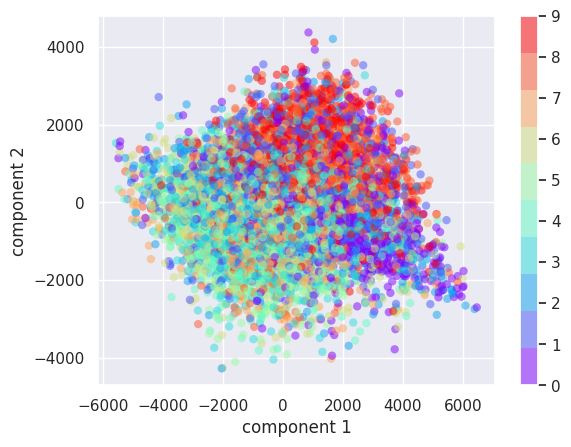

In [127]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

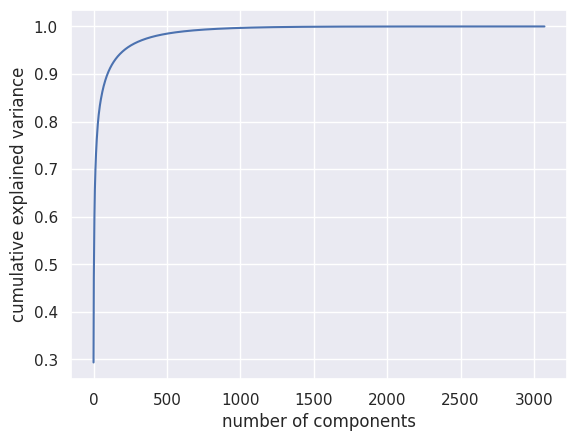

In [128]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### From the above graph, it appears that out of a total of 3072 componets, only about 500 is needed to explain the most of the variance. This tell us that the CIFAR 10 dataset that company ATS utilizes for its image classification tasks only need about 500 components to explain close to all of the variance!

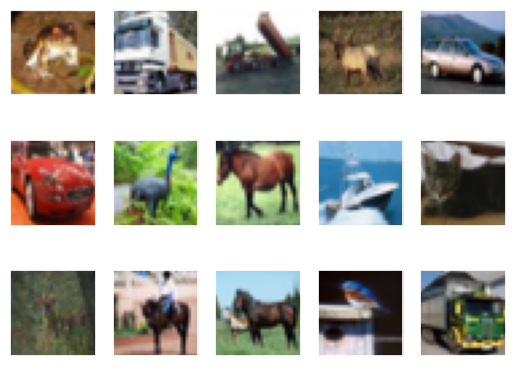

In [133]:

def plot_img(variable):
    fig, ax = plt.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(variable[i], cmap='bone')
        axi.set(xticks=[], yticks=[],
            )
plt.show()

plot_img(data)

### Adding Noise to the Above Dataset

In [134]:
min_val = np.min(data)
max_val = np.max(data)

print(f"Min: {min_val}, Max: {max_val}")


Min: 0, Max: 255


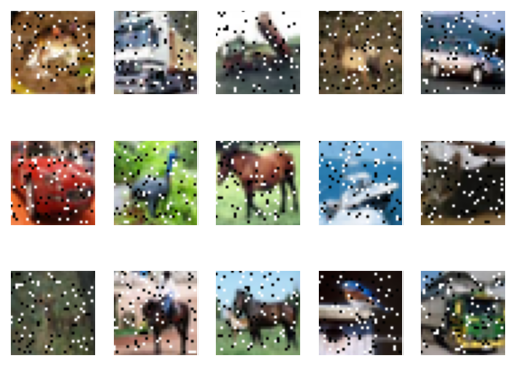

In [135]:
def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    total_pixels = image.shape[0] * image.shape[1]

    # Number of salt noise pixels
    num_salt = np.ceil(total_pixels * salt_prob)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1], :] = 255

    # Number of pepper noise pixels
    num_pepper = np.ceil(total_pixels * pepper_prob)

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1], :] = 0

    return image

# Apply salt-and-pepper noise to all images
noisy = np.array([salt_and_pepper_noise(img, 0.05, 0.05) for img in data])

plot_img(noisy)


### We will test the Prediction Accuracy of the previous SVM model on the noisy CIFAR-10 dataset

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'noisy' is your noisy data and 'y' are the labels
X = noisy  # Noisy data
y = data_batch_1[b'labels']

# Flatten the image data
X_flat = X.reshape(X.shape[0], -1)  # Reshape to (num_samples, num_features)

# Split flattened data into training and testing sets (80% train, 20% test)
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC(kernel='rbf')  # Best performing kernel out of poly and linear

# Train the model on the training data
svm_model.fit(X_train_flat, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_flat)

# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.45


In [93]:
from sklearn.decomposition import PCA

# Reshape the data to two dimensions
noisy_2d = noisy.reshape(noisy.shape[0], -1)

# Apply PCA
pca = PCA(0.90)
pca.fit(noisy_2d)
pca.n_components_

683

### In Conclusion For A Proof of Concept, One Can See That The SVM Performs A Little Better For the Original Data with an Accuracy of 0.48, Unaffected By Noise Than For the Noise Polluted Data at Accuracy Level of 0.45. This Tells Us Two Things


1.   SVM is Sensitive to Noise
2.   Company ATS Needs to Spend More Time on Improving Models' Robustness Against Different Types of Noise.

In This Code I used Various Types of Algorithms and Concepts Discussed

